## still a draft
## maybe ok if correlation matrix has no nan
## coding style, try to follow rules

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"][0] = 12
#plt.rcParams["figure.figsize"][1] = 8

In [3]:
plt.rcParams["figure.figsize"][0] = 9
plt.rcParams["figure.figsize"][1] = 6

In [4]:
## additional import

from sklearn.metrics import matthews_corrcoef
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
import gc
from tqdm import tqdm

/usr/bin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# import necessaries
#project into 3-dim with pca
from mpl_toolkits import mplot3d
#import matplotlib.pyplot as plt
from sklearn import decomposition

In [6]:
#data = pd.read_table("aps_failure_training_set.csv", header=None)
## customer
data = pd.read_table("spambase.data", sep=',', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
## encoding feature 0?
## value_count first
data.iloc[:, 57].value_counts()

0    2788
1    1813
Name: 57, dtype: int64

## only names
## drop 1 columns
dataTemp = data.drop(['Unnamed: 0'], axis=1)
dataTemp.head()

In [8]:
## check missing
data.isnull().any().any()


False

In [9]:
## only for Spambase
dataTemp = data

In [10]:
DimT = len(dataTemp.columns)
print(DimT)

58


In [11]:
## now load y label since need to drop 0th row

#y_temp = pd.read_csv('secom_labels.data.txt', sep=' ', header=None)
y_temp = dataTemp.iloc[:, DimT-1]


#y_temp = y_temp.drop([0,1])
y_temp.head()

0    1
1    1
2    1
3    1
4    1
Name: 57, dtype: int64

y_label = y_temp.iloc[:, 0]
y_label[ y_label == -1] = 0
y_label

In [12]:
y_temp.value_counts()

0    2788
1    1813
Name: 57, dtype: int64

In [13]:
## deal with label
## 1 against rest first
N = len(y_temp)
y_label = np.zeros(N)
y_label[y_temp == 1] = 1

# y_label ready

In [14]:
## drop label
dataTemp2 = dataTemp.drop([DimT-1], axis=1)
dataTemp2.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [15]:
dataTemp2.describe()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [16]:
## drop std == 0 
STD_DES = dataTemp2.describe().loc['std']
zeros = np.where(STD_DES == 0)[0]
zeros

array([], dtype=int64)

In [ ]:
## random sample data since too large
## from train test split?



In [ ]:
## for Epileptic 
## 1 against rest
## 1 against another(2,3,4,5)(latter)


In [ ]:
# ---------------- process --------------------

## import dataset

## recognize y_label
## X be dataFrame, y be series
## see if need reduce row with random sampling split

## deal with nan

## plotly to check distribution, see shape
### whole
## Laplacian, see best k from eigen gap(make function)
### clustered


In [ ]:
## see whole first


In [17]:
## optional
pStr = 'Spambase'

In [18]:
colors = ['rgb(55,126,184)','rgb(228,26,28)','rgb(77,175,74)']

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title=pStr,
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        #aspectmode = 'manual'        
    ),
)


In [19]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [20]:
## define function
## plot both data and label
## using plotly for interactive

# x should be dataframe, y should be series or np array
# X: original, Xpr: projected

# no need title
def plotly_PCAproj_xy(X, y_label, 
                      colors, layout, 
                      n_comp = 3):

    Xtemp = X.values.copy()
    
    pca = decomposition.PCA(n_components=n_comp)
    pca.fit(Xtemp)
    # maybe can put separately
    Xpr = pca.transform(Xtemp)

    # for safety, using numpy tool after transform
    #y_temp = y.values.copy()
    
    #Xpr_n = Xpr[np.where(y_temp == 0)[0]]
    #Xpr_a = Xpr[np.where(y_temp == 1)[0]]
    
    ## running
    data = []
    pointName = ['normal','anomaly']

    for i in range(0, 2):
        # 0 normal 1 anomaly
        temp = X.loc[y_label == i]
        temp_now = pca.transform(temp)

        name = names
        color = colors[i]
        x = temp_now[:,0]
        y = temp_now[:,1]
        z = temp_now[:,2]

        trace = dict(
                name = pointName[i],
                x = x, y = y, z = z,
                type = "scatter3d",    
                mode = 'markers',
                marker = dict( size=2, color=color, line=dict(width=0) ) )
        data.append(trace)
    len(data)    
    # plot
    fig = dict(data=data, layout=layout)

    # IPython notebook
    iplot(fig, filename='implement', validate=False)
    
    
# 3-D plot
# X as dataFrame
# maybe no title first
def plotly_3D_xy(X, y_label, 
                 colors, layout):

    data = []
    pointName = ['normal','anomaly']

    for i in range(0, 2):
        # 0 normal 1 anomaly
        temp_now = X.loc[y_label == i].copy()
        print(i, len(temp_now), len(X))

        name = pointName[i]
        color = colors[i]
        x = temp_now.iloc[:,0].values.copy()
        y = temp_now.iloc[:,1].values.copy()
        z = temp_now.iloc[:,2].values.copy()

        trace = dict(
                name = name,
                x = x, y = y, z = z,
                type = "scatter3d",    
                mode = 'markers',
                marker = dict( size=2, color=color, line=dict(width=0) ) )
        
        data.append(trace)  
    # plot
    fig = dict(data=data, layout=layout)

    # IPython notebook
    iplot(fig, filename='implement', validate=False)

    
## 2-D plot
# X as dataFrame
## for 2D, original plt is enough
def plot2D_xy(X, y):
    # normal
    Xpr_n = X.loc[y == 0].values.copy()
    # anomaly
    Xpr_a = X.loc[y == 1].values.copy()
    
    ax = plt.axes()

    
    plt.plot(Xpr_n[:,0], Xpr_n[:,1], 'co')
    plt.plot(Xpr_a[:,0], Xpr_a[:,1], 'ro')
    
    
    #plt.plot(Xpr[:,0], Xpr[:,1])
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    plt.show()


## get y_label
## may need transform to 0 1
# manuelly

dataX = dataTemp2.drop([1558], axis = 1)


y_temp = dataTemp2.iloc[:, 1558]
y_label = np.zeros(len(y_temp))
y_label[ y_temp == pStr ] = 1
## y ready

In [21]:
#dataTemp2Scale = (dataTemp2-dataTemp2.min()) / (dataTemp2.max()-dataTemp2.min())
dataTemp2Scale = (dataTemp2-dataTemp2.mean()) / (dataTemp2.std())

In [22]:
## make sure that data exclude y_label
#dataX = dataTemp2
dataX = dataTemp2Scale
y_current = y_label
#y_label = y_temp
# y_label ready

In [ ]:
## random sample
selectIdx = np.random.choice(60000, 10000, replace=False)
selectIdx

In [ ]:
dataX = dataTemp4.iloc[selectIdx]
y_current = y_label[selectIdx]

In [188]:
## plot whole
names = 'Spam whole'
plotly_PCAproj_xy(dataX, y_current, 
                  colors, layout, 
                  n_comp=3)

In [23]:
def showLaplacian(currentData, pickN=100):
    tempW = currentData.corr().values
    weight_abs = abs(tempW)
    #w_abs
    plt.imshow(weight_abs)
    #show scale of colors
    plt.colorbar()
    plt.show()
    
    ## for correlation matrix, take normal only at first
    # plot out eigen gap first

    from scipy.sparse import csgraph

    ## note: from github, normalized Laplacian is symmetric

    Lsym = csgraph.laplacian(weight_abs, normed = True)

    # eigen decomposition
    from numpy import linalg as LA
    w, v = LA.eig(Lsym)
    sortW = np.sort(w) # no need order here

    ## plot out
    ## adjust plot parameter

    tempX = np.arange(len(sortW))+1

    plt.scatter(tempX, sortW)
    plt.plot(tempX, sortW)
    plt.show()
    
    
    ## plot eigen difference

    diffSortW = np.diff(sortW)

    tempX = np.arange(len(diffSortW))+1

    # bar plot
    plt.bar(tempX, diffSortW)
    plt.show()
    
    ## show top candidates of k choices
    ## see eigen gap, find from big to small
    ## just print out at first
    ## for i in diffSortW, means eigen i+1 - i
    ## but python start from 0, so add 1 
    rank0 = np.argsort(-diffSortW)
    rank = rank0[0:pickN]+1
    
    #print(rank0[0:pickN])
    print(rank)
    
    

    return weight_abs, diffSortW, rank

In [24]:
## take away y_label
currentData = dataX

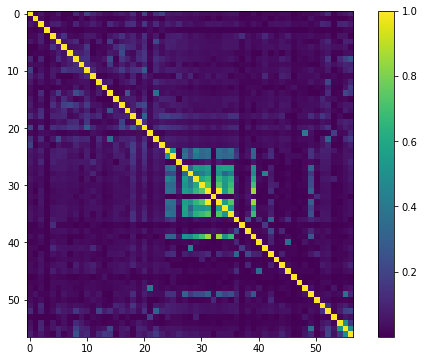

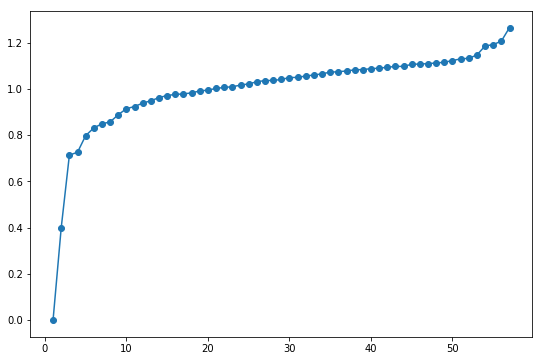

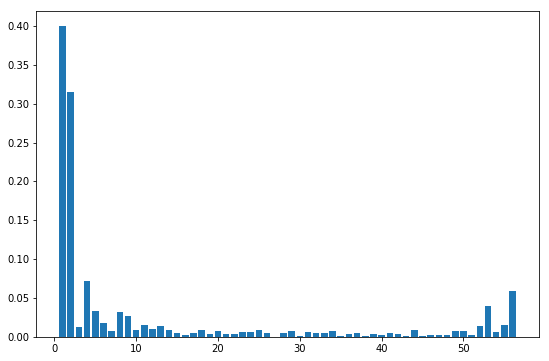

[ 1  2  4 56 53  5  8  9  6 55 11 52 13  3 12 10 25 14 44 18  7 29 49 20 34
 50 23 31 54 24 26 33 15 17 37 28 41 32 39 36 21 22 19 42 47 48 51 16 40 46
 35 38 45 30 43 27]


In [25]:
sPack = showLaplacian(currentData)
weight_abs = sPack[0]
diffSortW = sPack[1]
rank = sPack[2]

In [26]:
k = rank[5]
print(k)

5


In [27]:
from sklearn.cluster import spectral_clustering

# might have no choice to choose k = 2
labels = spectral_clustering(weight_abs, 
                             n_clusters=k, eigen_solver='arpack')

## get cluster index once and for all
feaNumArr = [None]*k
for clusKey in range(0, k):
    featureNum = np.where(labels == clusKey)[0]
    feaNumArr[clusKey] = featureNum
print(feaNumArr)

[array([24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 39, 49]), array([ 8, 14, 22, 52, 54, 55, 56]), array([36, 38, 40, 42, 45, 50]), array([21, 48, 53]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 15, 16, 17, 18,
       19, 20, 23, 26, 32, 37, 41, 43, 44, 46, 47, 51])]


In [28]:
import matplotlib.patches as patches

In [29]:
def reArrangeW(labels, currentData):
    ## show correlation matrix with rearrangement

    arrange = np.zeros(len(labels))
    idxH = 0
    # rearrenge
    for clusKey in range(0, k):
        featureNum = np.where(labels == clusKey)[0]

        idxE = idxH + len(featureNum)

        # become float type
        arrange[idxH:idxE] = featureNum

        #updata index
        idxH = idxE

        #print(arrange)

    # transform back to integer
    arrange = arrange.astype(int)
    
    # indexing with iloc
    reArrData = currentData.iloc[:, arrange]
    tempW = reArrData.corr().values
    weight_abs = abs(tempW)
    
    
    # Create figure and axes
    fig,ax = plt.subplots(1)
    
    
    #w_abs
    ax.imshow(weight_abs)
    #show scale of colors
    #plt.colorbar()
    
    
    ## add blocks here
    # Create a Rectangle patch
    ## adjust 0.5, by Yang (ˊ● ω ●ˋ)
    sPoint = np.zeros(2)-0.5
    for clusKey in range(0, k):
        featureNum = np.where(labels == clusKey)[0]
        width = len(featureNum)
        
        rect = patches.Rectangle(sPoint, width, width,linewidth=1,edgecolor='white',facecolor='none')
        ax.add_patch(rect)

        
        sPoint = sPoint + width
    plt.show()

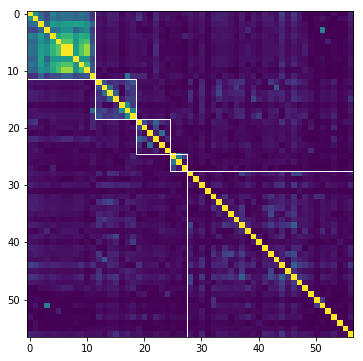

In [30]:
reArrangeW(labels, currentData)

In [ ]:
## import here


colors = ['rgb(55,126,184)','rgb(228,26,28)','rgb(77,175,74)']

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='tryout',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        #aspectmode = 'manual'        
    ),
)


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## fix printout problem, refine rate_limit
## ref: https://stackoverflow.com/questions/43288550/iopub-data-rate-exceeded-when-viewing-image-in-jupyter-notebook
## ref: 

In [ ]:
## prepare list for plotly first
## deal with data inside function
## only plot one each time QQ

## see if need to control n rows

tempY = y_label
tempY

In [31]:
## if random selected, in order to prevent out of memory
currentData = dataX
tempY = y_current

for clusKey in range(0, 10):
    featureNum = feaNumArr[clusKey]
    X = currentData.iloc[:, featureNum]
    
    print("Cluster ", clusKey)
    print(featureNum)
    if len(featureNum) > 3:
        print("PCA into 3 dim")
        plotly_PCAproj_xy(X, tempY, names, colors, layout)
    elif len(featureNum) == 3:
        print("3D plot")
        plotly_3D_xy(X, tempY, names, colors, layout)
    elif len(featureNum) == 2:
        plot2D_xy(X, tempY)
    else:
        print("In ", clusKey, ", only 1 dimension")

In [ ]:
currentData.describe()

for clusKey in range(0, k):
    featureNum = feaNumArr[clusKey]
    X = currentData.iloc[:, featureNum]
    
    print("Cluster ", clusKey)
    print(featureNum)
    if len(featureNum) > 3:
        print("PCA into 3 dim")
        plotly_PCAproj_xy(X, tempY, names, colors, layout)
    elif len(featureNum) == 3:
        print("3D plot")
        plotly_3D_xy(X, tempY, names, colors, layout)
    elif len(featureNum) == 2:
        plot2D_xy(X, tempY)
    else:
        print("In ", clusKey, ", only 1 dimension")

tempY = y_train['Response']

In [ ]:
## do manuelly
## copy cluster elements

featureNum = np.array([22, 23, 25, 26, 27])

In [ ]:
## cluster 10(?): 22 23 25 26 27

In [ ]:
str(featureNum)

In [ ]:
names = 'APS whole'

In [198]:
clusKey = 4
#X = X_train.iloc[:, featureNum]
featureNum = feaNumArr[clusKey]

X = currentData.iloc[:, featureNum]
#tempY = y_label[idxT]
    
#print("Cluster ", clusKey)
print(featureNum)
if len(featureNum) > 3:
    print("PCA into 3 dim")
    plotly_PCAproj_xy(X, tempY, colors, layout)
elif len(featureNum) == 3:
    print("3D plot")
    plotly_3D_xy(X, tempY, colors, layout)
elif len(featureNum) == 2:
    plot2D_xy(X, tempY)
else:
    print("In ", clusKey, ", only 1 dimension")

[36 38 40 42 45 50]
PCA into 3 dim


## try detecting

In [32]:
def Track_w(x, w, d, beta):
    y = x.dot(w)
    d = beta*d + y*y
    e = x- y*w
    wNew = w + (y/d)*e
    return wNew, d

#becareful shape of sim_pool


def OD_onlinePCA_m(A, beta):
    #here A is 2-dim array
    
    #row, col of A
    n, p = A.shape
    
    A_m = np.mean(A, axis = 0)
    d = 0.0001
    u = np.ones(p)
    
    for i in range(0, n):
        u ,d = Track_w(A[i,:]-A_m, u, d, 1)
    #end
    u = u/np.linalg.norm(u)
    
    sim_pool = np.zeros(n)
    ratio = 1/(n*beta)
    
    for i in range(0,n):
        temp_mu = (A_m + ratio*A[i,:])/ (1+ratio)
        x = A[i, :] - temp_mu
        
        w1, d1 = Track_w(x, u, d, beta)
        w1 = w1/ np.linalg.norm(w1)
        
        sim_pool[i] = abs(u.dot(w1) )
        
        #if i%10000 == 0:
            #print('iteration '+ str(i))
        
    #end

    suspicious_index = np.argsort(sim_pool)
    suspicious_score = 1-sim_pool
    
    return suspicious_index, suspicious_score, u, d

#becareful shape of sim_pool

#suspicious_index: turn order accending original index into rank array

def OD_onlinePCA_forget(A, beta, ini_For):
    #here A is 2-dim array
    
    #row, col of A
    n, p = A.shape
    
    A_m = np.mean(A, axis = 0)
    d = 0.0001
    u = np.ones(p)
    
    for i in range(0, n):
        u ,d = Track_w(A[i,:]-A_m, u, d, ini_For)
        #
        #print(u)
    #end
    u = u/np.linalg.norm(u)
    
    
    sim_pool = np.zeros(n)
    ratio = 1/(n*beta)
    
    for i in range(0,n):
        temp_mu = (A_m + ratio*A[i,:])/ (1+ratio)
        x = A[i, :] - temp_mu
        
        w1, d1 = Track_w(x, u, d, beta)
        w1 = w1/ np.linalg.norm(w1)
        
        sim_pool[i] = abs(u.dot(w1) )
        
        #if i%10000 == 0:
            #print('iteration '+ str(i))
        
    #end
    
    suspicious_index = np.argsort(sim_pool)
    suspicious_score = 1-sim_pool
    
    return suspicious_index, suspicious_score, u, d



In [33]:
## cleaning by droping top t%, remain top as threshold, via OD_onlinePCA_m
# drop with whole data, and clusterd data(k results)
# show threshold

# construct function since need implements many times

def cleanPCA(A, sRate, beta, ini_For = 1, drop_rate_t = 0.05):
    suspicious_index, suspicious_score, u, d = OD_onlinePCA_forget(A, beta, ini_For)
    
    #
    u0 = u
    
    #drop top t data, suspicious_index descending order
    #print("A.shape[1] ", A.shape[1])
    dropN = int(A.shape[0]*drop_rate_t)
    
    cleanIdx = suspicious_index[dropN:len(suspicious_index)]
    cleanA = A[cleanIdx, :]
    
    #print(dropN, cleanA.shape[0])
    
    #just check
    #print(suspicious_score[suspicious_index])
    
    #print threshold, before deleting top datas
    # threshold = suspicious_score[cleanIdx[0]]
    
    #last from dropped
    threshold = suspicious_score[suspicious_index[dropN-1]]
    #print("Threshold: ", threshold)
    
    
    
    
    #get new u
    betaR = 1/(sRate*cleanA.shape[0])
    suspicious_index, suspicious_score, u, d = OD_onlinePCA_forget(cleanA, betaR, ini_For)
    
    cleanCos = abs(u.dot(u0))
    #print(cleanCos)
    # return pca from clean data, return threshold, new beta
    return u, d, threshold, betaR, cleanCos 

def detectScore(x, u, d, betaR):
    newU, newD = Track_w(x, u, d, betaR)
    
    newU = newU / np.linalg.norm(newU)
    score = 1 - abs(u.dot(newU))
    
    return score
    
    
#detecting

## test ready

# return 01 array, 1 as anomaly
def test_pca(testA, u, d, betaR, threshold, UPDATE = True, upFor = 1):
    N = testA.shape[0]
    result = np.zeros(N)
    
    #
    scoreTable = np.zeros(N)
    
    u0 = np.copy(u)
    d0 = np.copy(d)
    
    for i in range(0, N):
        x = testA[i, :]
        #scoring
        score = detectScore(x, u0, d0, betaR)
        
        # for auc
        scoreTable[i] = score
        
        #print(score)
        
        #check threshold
        if score >= threshold:
            result[i] = 1
        else:
            # regarded it as normal
            # update if needed
            if UPDATE:
                newU, newD = Track_w(x, u0, d0, upFor)
                
                u0 = newU / np.linalg.norm(newU)
                d0 = newD
            
        
    #end for
    
    
    return result, scoreTable



In [34]:
## multiple cleaning

def cleanPCA_mul(feaNumArr, k, A, sRate, beta, ini_For = 1, drop_rate_t = 0.05):
    
    uArr = [None]*k
    dArr = np.zeros(k)
    thresholdArr = np.zeros(k)
    cleanCosArr = np.zeros(k)
    # betaR should be the same for all clusters
    
    # A already an array
    
    for clusKey in range(0, k):
        featureNum = feaNumArr[clusKey]
        tempA = A[:, featureNum]
        u, d, threshold, betaR, cleanCos = cleanPCA(tempA, sRate, beta, ini_For, drop_rate_t)
        
        uArr[clusKey] = u
        dArr[clusKey] = d
        thresholdArr[clusKey] = threshold
        cleanCosArr[clusKey] = cleanCos
        
    #maybe return objects, only uArr faced problem
    return uArr, dArr, thresholdArr, betaR, cleanCosArr


## scoring strategies for multiple clusters

# input scoringTable, thresholdArray, strategy(categorial variable)
# output boolean, if alert or not


def judgeAlert(scoringArr, thresholdArr, strategy):
    anomaly = False
    
    MAX = 0
    AVG = 1
    ANY = 2
    
    if strategy == MAX:
        score = np.max(scoringArr)
        threshold = np.max(thresholdArr)
        if score >= threshold:
            anomaly = True
        else :
            anomaly = False
        
    elif strategy == AVG:
        score = np.mean(scoringArr)
        threshold = np.mean(thresholdArr)
        if score >= threshold:
            anomaly = True
        else :
            anomaly = False
        
    elif strategy == ANY:
        k = len(thresholdArr)
        #print("k: ", k)
        for i in range(0, k):
            if scoringArr[i] >= thresholdArr[i]:
                anomaly = True
                #print(i, scoringArr[i], thresholdArr[i])
        #end for i
    

    
    return anomaly

# for multiple clustering, deciding scoring strategies
# detecting

## test ready

# return 01 array, 1 as anomaly
def test_pca_mul(feaNumArr, k, strategy, testA, uArr, dArr, betaR, thresholdArr, UPDATE = True, upFor = 1):
    N = testA.shape[0]
    result = np.zeros(N)
    scoringTable = np.zeros([N,k])
    
    uArr0 = np.copy(uArr)
    dArr0 = np.copy(dArr)
    
    for i in tqdm(range(0, N)):
        x = testA[i, :]
        
        scoringArr = np.zeros(k)
        xprArr = [None]*k
        for clusKey in range(0, k):
            #scoring
            featureNum = feaNumArr[clusKey]
            xpr = x[featureNum]
            xprArr[clusKey] = xpr
            
            u0 = uArr0[clusKey]
            d0 = dArr0[clusKey]
            
            score = detectScore(xpr, u0, d0, betaR)
            scoringArr[clusKey] = score
            
            #print(clusKey, score)            
        #end for clusKey
        
        scoringTable[i,:] = scoringArr
        # strategy variables, categorical
        anomaly = judgeAlert(scoringArr, thresholdArr, strategy)
        
        # check bool variables
        if anomaly:
            result[i] = 1
        else:
            # regarded it as normal
            # update if needed
            if UPDATE:
                # update each clusters
                for clusKey in range(0, k):
                    xpr = xprArr[clusKey]
                    u0 = uArr0[clusKey]
                    d0 = dArr0[clusKey]
                    newU, newD = Track_w(xpr, u0, d0, upFor)

                    u0 = newU / np.linalg.norm(newU)
                    d0 = newD
                    
                    uArr0[clusKey] = u0
                    dArr0[clusKey] = d0
            
        
    #end for
    
    
    return result, scoringTable

## function for dropping bad cluster

def checkCluster(thresholdArr, LowBDD, UpBdd=1):
    fineClus = np.where((thresholdArr>=LowBDD) & (thresholdArr<UpBdd))[0]
    
    return fineClus

# for multiple clustering, deciding scoring strategies
# detecting

## test ready

# return 01 array, 1 as anomaly
def test_pca_mul_select(fineClus, feaNumArr, k, strategy, testA, uArr, dArr, betaR, thresholdArr, UPDATE = True, upFor = 1):
    N = testA.shape[0]
    result = np.zeros(N)
    scoringTable = np.zeros([N,k])
    
    uArr0 = np.copy(uArr)
    dArr0 = np.copy(dArr)
    
    for i in tqdm(range(0, N)):
        x = testA[i, :]
        
        scoringArr = np.zeros(k)
        xprArr = [None]*k
        for clusKey in fineClus:
            #scoring
            featureNum = feaNumArr[clusKey]
            xpr = x[featureNum]
            xprArr[clusKey] = xpr
            
            u0 = uArr0[clusKey]
            d0 = dArr0[clusKey]
            
            score = detectScore(xpr, u0, d0, betaR)
            scoringArr[clusKey] = score
            
            #print(clusKey, score)            
        #end for clusKey
        
        scoringTable[i,:] = scoringArr
        # strategy variables, categorical
        anomaly = judgeAlert(scoringArr[fineClus], thresholdArr[fineClus], strategy)
        
        # check bool variables
        if anomaly:
            result[i] = 1
        else:
            # regarded it as normal
            # update if needed
            if UPDATE:
                # update each clusters
                for clusKey in fineClus:
                    xpr = xprArr[clusKey]
                    u0 = uArr0[clusKey]
                    d0 = dArr0[clusKey]
                    newU, newD = Track_w(xpr, u0, d0, upFor)

                    u0 = newU / np.linalg.norm(newU)
                    d0 = newD
                    
                    uArr0[clusKey] = u0
                    dArr0[clusKey] = d0
            
        
    #end for
    
    
    return result, scoringTable

## for output one score
def oneScore(scoringTable, strategy):
    MAX = 0
    AVG = 1
    
    if strategy == MAX:
        return np.amax(scoringTable, axis=1)
    elif strategy == AVG:
        return np.mean(scoringTable, axis=1)
    else:
        print('Wrong strategy')
        return np.zeros(1)

In [35]:
currentData = dataX
# y_label need back to series
## also bring back index

X_index = dataX.index

y_Series = pd.Series(y_label, index=X_index)
y_Series = y_Series.rename('label')
y_Series.head()


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: label, dtype: float64

In [36]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [37]:
## need separate functions to run every feature

## for whole dataset
## for clustered dataset

## build basis experiment fucntion
## using previous reference names
## half normal, other normal and all anomaly
## finish in one block

## follow coding style
## return exp result
def oneRandomTrailWhole(X_nor, X_test, y_test,
                        sRateW, betaW, ini_For_W, dropRateT_W):
    '''
    One time random trail for whole data detection and clustered data detection
    
    Parameter
    ---------
    norNum : 
    
    currentWhole
    
    sRate : sampling rate, also for recompute beta after cleaning process
    
    beta : from sampling rate(sRate), for initial training
    
    ini_For : 
    
    dropRateT:
    
    
    
    Returns
    -------

    
    tprW
    
    fprW
    
 
    
    '''

    y_true = y_test

    ## whole
    A = X_nor.astype(float).values.copy()
    A.shape

    #sRate = 0.3
    #beta = 1/(sRate*len(X_nor))
    #dropRateT = 0.02

    ## add AUC
    ## put tqdm in pca
    A = X_nor.astype(float).values.copy()


    u, d, threshold, betaR_W, cleanCos = cleanPCA(A, sRateW, betaW, ini_For=ini_For_W, drop_rate_t=dropRateT_W)

    #print('--------------------')



    #get y_labels
    testA = X_test.astype(float).values.copy()

    # detecting
    ## UPDATE default True
    result, scoreTable = test_pca(testA, u, d, betaR_W, threshold)


    tn, fp, fn, tp = confusion_matrix(y_true, result).ravel()

    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)
    #tprW[trail] = tpr
    #fprW[trail] = fpr
    tprW = tpr
    fprW = fpr
    
    # ref: https://stats.stackexchange.com/questions/95209/how-can-i-interpret-sklearn-confusion-matrix
    #print('tpr: ', tpr, ', fpr: ', fpr)
    #pd.crosstab(y_true, result ,rownames=['True'], colnames=['Predicted'], margins=True)
    
    auc = roc_auc_score(y_true, scoreTable)
    
    return tprW, fprW, auc



## build basis experiment fucntion
## using previous reference names
## half normal, other normal and all anomaly
## finish in one block

## follow coding style
## return exp result
def oneRandomTrailClus(X_nor, X_test, y_test,
                       sRateClus, betaClus, ini_For_Clus, dropRateT_Clus,
                       k, thresLowBDD, strategy,
                       thresUpBdd=1,
                       MANUEL=False, manuelClus=[]):
    '''
    One time random trail for whole data detection and clustered data detection
    
    Parameter
    ---------
    norNum : 
    
    currentWhole
    
    sRate : sampling rate, also for recompute beta after cleaning process
    
    beta : from sampling rate(sRate), for initial training
    
    ini_For : 
    
    dropRateT:
    
    thresBDD: 
    
    strategy : 
    
    
    
    Returns
    -------
    fineClus
    
    tprW
    
    fprW
    
    tprClus
    
    fprClus
    
    
    '''

    y_true = y_test

    ## -----------------------------------------------------------------
    ## Laplacian
    currentTrain = X_nor.astype(float)
    tempTrainA = currentTrain.values.copy()

    ## can't deal with A array 
    ## need new A since dimension may changed
    uArr, dArr, thresholdArr, betaR_Clus, cleanCosArr =cleanPCA_mul(feaNumArr, k, tempTrainA, sRateClus, betaClus,
                                                               ini_For=ini_For_Clus, drop_rate_t=dropRateT_Clus)

    #BDD = 0.001
    ## for observing
    print('ThresholdArr: ', thresholdArr)
    fineClus = checkCluster(thresholdArr, thresLowBDD, thresUpBdd)
    print('Fine Clusters: ', fineClus)
    #fineClusObj.append(fineClus)

    if MANUEL:
        print('Manuelly control cluster')
        fineClus = manuelClus
    
    #deg = 15
    #rad = np.deg2rad(deg)
    #BDD = np.cos(rad)


    #MAX = 0
    #AVG = 1
    #ANY = 2
    #strategy = MAX

    ## reorderTrain, reorderTest ready
    ## using same sampleRate, beta
    ## using same clean drop rate

    ## fix some reference names
    ## control fpr to compare

    tempTest = X_test

    currentTest = tempTest

    testClusA = currentTest.astype(float).values.copy()

    

    resultPack = test_pca_mul_select(fineClus, feaNumArr, k, strategy, testClusA, uArr, dArr, betaR_Clus, thresholdArr)
    resultFineClus = resultPack[0]
    scoringTable = resultPack[1]
    
    scoreOneTable = oneScore(scoringTable, strategy)

    tn, fp, fn, tp = confusion_matrix(y_true, resultFineClus).ravel()
    
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)
    #tprClus[trail] = tpr
    #fprClus[trail] = fpr
    tprClus = tpr
    fprClus = fpr

    # ref: https://stats.stackexchange.com/questions/95209/how-can-i-interpret-sklearn-confusion-matrix
    print('tpr: ', tpr, ', fpr: ', fpr)
    pd.crosstab(y_true, resultFineClus, rownames=['True'], colnames=['Predicted'], margins=True)
    
    auc = roc_auc_score(y_true, scoreOneTable)
    aucClus = auc
    
    return fineClus, tprClus, fprClus, aucClus

In [38]:
sampArr = 0.01 * (np.arange(31) + 10)
dropArr = 0.0025 * (np.arange(81))

print(sampArr)
print(dropArr)

[ 0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21
  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33
  0.34  0.35  0.36  0.37  0.38  0.39  0.4 ]
[ 0.      0.0025  0.005   0.0075  0.01    0.0125  0.015   0.0175  0.02
  0.0225  0.025   0.0275  0.03    0.0325  0.035   0.0375  0.04    0.0425
  0.045   0.0475  0.05    0.0525  0.055   0.0575  0.06    0.0625  0.065
  0.0675  0.07    0.0725  0.075   0.0775  0.08    0.0825  0.085   0.0875
  0.09    0.0925  0.095   0.0975  0.1     0.1025  0.105   0.1075  0.11
  0.1125  0.115   0.1175  0.12    0.1225  0.125   0.1275  0.13    0.1325
  0.135   0.1375  0.14    0.1425  0.145   0.1475  0.15    0.1525  0.155
  0.1575  0.16    0.1625  0.165   0.1675  0.17    0.1725  0.175   0.1775
  0.18    0.1825  0.185   0.1875  0.19    0.1925  0.195   0.1975  0.2   ]


In [39]:
NTRAIL = 5
currentWhole = pd.concat([currentData, y_Series], axis=1)

## version 1
norNum = int(len(currentData)/2)

## version 2
## not able to decide here
## norNum
## anoNum
# RANDOMPICK = False
RANDOMPICK = True


# for pca
#sRateW = 0.3
#betaW = 1/(sRateW*(norNum))
#ini_For_W = 1
#dropRateT_W = 0.025

#sRateClus = 0.3
#betaClus = 1/(sRateClus*(norNum))
#ini_For_Clus = 1
#dropRateT_Clus = 0.025

# already have k
thresBDD = 0.001
#strategy = AVG
## maybe no more ANY, since hard to control fpr, auc

In [ ]:
norNum

In [ ]:
sRate = 0.2
beta = 1/(sRate*len(X_nor))
dropRateT = 0.02

In [ ]:
BDD = 0.001
fineClus = checkCluster(thresholdArr, BDD)
fineClus

In [40]:
## trying whole parameter
## give up observing fineClus first
## no ctrl of fineClus bound first
##
## get best for whole is the main point

## store tpr, fpr

## parameter in trail:
## whole sampling rate
## whole drop rate

## clus samping rate
## clus sampling rate
## fineClus bound? withdraw first 
## clus strategy

tprW = np.zeros([len(sampArr),len(dropArr),NTRAIL])
fprW = np.zeros([len(sampArr),len(dropArr),NTRAIL])
aucW = np.zeros([len(sampArr),len(dropArr),NTRAIL])

tprClus_avg = np.zeros([len(sampArr),len(dropArr), NTRAIL])
fprClus_avg = np.zeros([len(sampArr),len(dropArr), NTRAIL])

tprClus_max = np.zeros([len(sampArr),len(dropArr), NTRAIL])
fprClus_max = np.zeros([len(sampArr),len(dropArr), NTRAIL])



## just for test

norIdxTemp = currentWhole.loc[currentWhole['label'] == 0].index.values.copy()

anoIdxTemp = currentWhole.loc[currentWhole['label'] == 1].index.values.copy()
anoNum = int(len(norIdxTemp)*0.1)
anoIdx = np.random.choice(anoIdxTemp, anoNum, replace=False)
X_ano_pick = currentWhole.loc[anoIdx].copy()
X_nor_pick = currentWhole.loc[norIdxTemp].copy()
currentPart = pd.concat([X_ano_pick,X_nor_pick], axis=0)

currentPart['label'].value_counts()
norNum = int(len(currentPart)/2)
        
## now currentPart is the whole dataset
norPartIdxTemp = currentPart.loc[currentPart['label'] == 0].index.values.copy()

#rest is the same :)
norIdx = np.random.choice(norPartIdxTemp, norNum, replace=False)
X_nor_temp = currentPart.loc[norIdx].copy()
X_nor = X_nor_temp.drop(['label'], axis=1)

X_test_temp = currentPart.drop(X_nor.index, axis=0)
X_test_temp2 = X_test_temp.sample(frac=1)
y_test = X_test_temp2['label']
X_test = X_test_temp2.drop(['label'], axis=1)


y_test.value_counts()

In [41]:
## for whole first

P = len(sampArr)
Q = len(dropArr)

for trail in range(0,NTRAIL):
    X_nor_temp = currentWhole.loc[currentWhole['label']==0].copy()
    X_nor_pre = X_nor_temp.sample(frac=0.5)
    X_nor_test = X_nor_temp.drop(X_nor_pre.index,axis=0)

    X_ano_temp = currentWhole.loc[currentWhole['label']==1].copy()


    ##
    if RANDOMPICK == False:
        X_ano = X_ano_temp
    else:
        ## 0.1 of number of all normal dataset
        X_ano = X_ano_temp.sample(n=int(len(X_nor_temp)*0.1))


    X_test_temp = pd.concat([X_nor_test,X_ano],axis=0)
    X_test_pre = X_test_temp.sample(frac=1)

    ## drop label from dataset
    X_nor = X_nor_pre.drop(['label'],axis=1)
    y_test = X_test_pre['label'].copy()
    X_test = X_test_pre.drop(['label'],axis=1)
    
    #just for test
    print(len(X_nor),len(X_test))
        

    ini_For_W = 1
    for pw in range(0,P):
        sRateW = sampArr[pw]
        betaW = 1/(sRateW*(norNum))
        
        for qw in range(0,Q):
            dropRateT_W = dropArr[qw]
            
            ## detecting
            tpr, fpr, auc = oneRandomTrailWhole(X_nor, X_test, y_test,
                         sRateW, betaW, ini_For_W, dropRateT_W)
            tprW[pw,qw,trail] = tpr
            fprW[pw,qw,trail] = fpr
            aucW[pw,qw,trail] = auc

## end of all for loop

avgTpr = tprW.mean(axis=2)
avgFpr = fprW.mean(axis=2)
avgAuc = aucW.mean(axis=2)
#print(avgTpr)
#print(avgFpr)
#print(avgAuc)

Start random pick
Start random pick
Start random pick
Start random pick
Start random pick


avgTpr = tprW.mean(axis=2)
avgFpr = fprW.mean(axis=2)
avgAuc = aucW.mean(axis=2)
#print(avgTpr)
#print(avgFpr)
#print(avgAuc)

In [57]:
## argsort already show index that value's accending order
aucIdx = np.unravel_index(np.argsort(-avgAuc, axis=None), avgAuc.shape)

aucIdx = np.transpose(np.array(aucIdx))

In [59]:
## appoint
## for loop, show sorting result

for i in range(0,100):
    if avgFpr[aucIdx[i,0],aucIdx[i,1]] < 0.2:
        print(i, avgAuc[aucIdx[i,0],aucIdx[i,1]], avgTpr[aucIdx[i,0],aucIdx[i,1]], avgFpr[aucIdx[i,0],aucIdx[i,1]] )

22 0.800866498896 0.301256732496 0.0394548063128
24 0.80081292227 0.298743267504 0.038737446198
25 0.800776861079 0.314901256732 0.0439024390244
26 0.80077377012 0.297666068223 0.038737446198
27 0.800746724227 0.297307001795 0.0384505021521
29 0.800694950661 0.311669658887 0.0431850789096
30 0.800675889745 0.310592459605 0.0423242467719
31 0.800647298373 0.294434470377 0.0377331420373
32 0.800638283075 0.275044883303 0.0327116212339
34 0.800596812706 0.271813285458 0.0325681492109
35 0.800568478913 0.269299820467 0.032281205165
36 0.800565387954 0.292998204668 0.0373027259684
37 0.800535251102 0.271095152603 0.0319942611191
39 0.800517478086 0.236983842011 0.0266857962697
40 0.800508205209 0.307001795332 0.0417503586801
41 0.80050511425 0.265709156194 0.0317073170732
42 0.800477038037 0.264272890485 0.0311334289813
43 0.800475234977 0.235547576302 0.0265423242468
44 0.800461840821 0.177378815081 0.0167862266858
45 0.800434537348 0.304488330341 0.0411764705882
46 0.800428870589 0.255296

In [ ]:
## i 897

In [60]:
i = 22
aucBestIdx = aucIdx[i,:]
print(aucBestIdx, sampArr[aucBestIdx[0]], dropArr[aucBestIdx[1]])


print(i, avgAuc[aucIdx[i,0],aucIdx[i,1]], avgTpr[aucIdx[i,0],aucIdx[i,1]], avgFpr[aucIdx[i,0],aucIdx[i,1]] )

[30  9] 0.4 0.0225
22 0.800866498896 0.301256732496 0.0394548063128


In [61]:
## for best sample rate for whole, see different drop rate
for j in range(0,81):
    print(avgAuc[aucIdx[i,0],j], avgTpr[aucIdx[i,0],j], avgFpr[aucIdx[i,0],j])


0.802327492279 1.0 0.999569583931
0.796485836967 0.0789946140036 0.0025824964132
0.798460702317 0.107360861759 0.00688665710187
0.799762253721 0.128186714542 0.00932568149211
0.799841073181 0.14039497307 0.0107604017217
0.800223321802 0.159425493716 0.0143472022956
0.800107925992 0.178456014363 0.0173601147776
0.800517478086 0.236983842011 0.0266857962697
0.800638283075 0.275044883303 0.0327116212339
0.800866498896 0.301256732496 0.0394548063128
0.800776861079 0.314901256732 0.0439024390244
0.800286171306 0.331059245961 0.0496413199426
0.799838497382 0.336804308797 0.0523672883788
0.800012363837 0.398922800718 0.080631276901
0.799499264609 0.414003590664 0.0888091822095
0.799365838204 0.438061041293 0.0994261119082
0.799181926131 0.466427289048 0.11406025825
0.798709524533 0.493357271095 0.129985652798
0.797623825114 0.497307001795 0.134289813486
0.797721963068 0.53249551167 0.152654232425
0.79771346293 0.554039497307 0.162410329986
0.797273773984 0.577378815081 0.175896700143
0.797343

In [62]:
MAX = 0
AVG = 1

In [205]:
ini_For_W = 1

sRateW = sampArr[aucBestIdx[0]]
betaW = 1/(sRateW*(norNum))

dropRateT_W = dropArr[aucBestIdx[1]]

sRateClus = 0.3
betaClus = 1/(sRateClus*(norNum))
ini_For_Clus = 1
dropRateT_Clus = 0.05
thresLowBDD = 0.00001
strategy = MAX

thresUpBdd = 0.02

manuelClusTry = np.array([2,3,5])

In [206]:
'''
appoint

best auc for pca on whole dataset known

try out better on pca with Laplacian

------------------------------------
already output scoreTable(pca_test function)

output one score with strategy, maybe function

'''

tprWhole = np.zeros(NTRAIL)
fprWhole = np.zeros(NTRAIL)
aucWhole = np.zeros(NTRAIL)

fineClusObj = []
tprLap = np.zeros(NTRAIL)
fprLap = np.zeros(NTRAIL)
aucLap = np.zeros(NTRAIL)




for trail in range(0,NTRAIL):
    norIdxTemp = currentWhole.loc[currentWhole['label'] == 0].index.values.copy()
    
    ##
    X_nor_temp = currentWhole.loc[currentWhole['label']==0].copy()
    X_nor_pre = X_nor_temp.sample(frac=0.5)
    X_nor_test = X_nor_temp.drop(X_nor_pre.index,axis=0)

    X_ano_temp = currentWhole.loc[currentWhole['label']==1].copy()


    ##
    if RANDOMPICK == False:
        X_ano = X_ano_temp
    else:
        ## 0.1 of number of all normal dataset
        X_ano = X_ano_temp.sample(n=int(len(X_nor_temp)*0.1))


    X_test_temp = pd.concat([X_nor_test,X_ano],axis=0)
    X_test_pre = X_test_temp.sample(frac=1)

    ## drop label from dataset
    X_nor = X_nor_pre.drop(['label'],axis=1)
    y_test = X_test_pre['label'].copy()
    X_test = X_test_pre.drop(['label'],axis=1)
    
    #just for test
    #print(len(X_nor),len(X_test))
    

    ## detecting
    tpr, fpr, auc = oneRandomTrailWhole(X_nor, X_test, y_test,
                 sRateW, betaW, ini_For_W, dropRateT_W)
    
    tprWhole[trail] = tpr
    fprWhole[trail] = fpr
    aucWhole[trail] = auc
    
    ## ---------------------------------------------------------------------
    
    # Laplacian
    
    fineClus, tprClus, fprClus, aucClus = oneRandomTrailClus(X_nor, X_test, y_test,
                                                             sRateClus, betaClus, ini_For_Clus, dropRateT_Clus,
                                                             k, thresLowBDD, strategy,
                                                             thresUpBdd)
    #fineClus, tprClus, fprClus, aucClus = oneRandomTrailClus(X_nor, X_test, y_test,
    #                                                         sRateClus, betaClus, ini_For_Clus, dropRateT_Clus,
    #                                                         k, thresBDD, strategy,
    #                                                         MANUEL=True, manuelClus=manuelClusTry)
    
    
    fineClusObj.append(fineClus)
    tprLap[trail] = tprClus
    fprLap[trail] = fprClus
    aucLap[trail] = aucClus
    
    

## end of all for loop

print('For whole dataset: ')
print('Auc: ', aucWhole.mean(), '+-', aucWhole.std())
print('Tpr: ', tprWhole.mean(), '+-', tprWhole.std())
print('Fpr: ', fprWhole.mean(), '+-', fprWhole.std())
print('For Laplacian: ')
print('Auc: ', aucLap.mean(), '+-', aucLap.std())
print('Tpr: ', tprLap.mean(), '+-', tprLap.std())
print('Fpr: ', fprLap.mean(), '+-', fprLap.std())
print('Fine clusters: ')
print(fineClusObj)

Start random pick


100%|██████████| 1951/1951 [00:00<00:00, 43733.63it/s]

ThresholdArr:  [  3.57798465e-02   2.69333626e-02   1.20964183e-04   4.31252619e-02
   1.27312948e-01]
Fine Clusters:  [2]
tpr:  0.996409335727 , fpr:  0.992826398852
Start random pick



100%|██████████| 1951/1951 [00:00<00:00, 25561.52it/s]

ThresholdArr:  [  2.22083950e-01   2.13858105e-02   1.81419725e-04   6.91338959e-03
   1.39497057e-01]
Fine Clusters:  [2 3]
tpr:  0.996409335727 , fpr:  0.996413199426
Start random pick



100%|██████████| 1951/1951 [00:00<00:00, 25226.70it/s]

ThresholdArr:  [  2.64703038e-01   2.73393900e-02   1.41208099e-04   1.23413065e-02
   1.10488731e-01]
Fine Clusters:  [2 3]
tpr:  0.938958707361 , fpr:  0.951219512195
Start random pick



100%|██████████| 1951/1951 [00:00<00:00, 16387.38it/s]

ThresholdArr:  [  4.32081597e-01   1.04194893e-02   8.58852620e-05   5.45096480e-02
   6.61305175e-02]
Fine Clusters:  [1 2]
tpr:  0.0789946140036 , fpr:  0.103299856528
Start random pick



100%|██████████| 1951/1951 [00:00<00:00, 26348.52it/s]

ThresholdArr:  [ 0.13511355  0.0212568   0.00016246  0.01212375  0.07496747]
Fine Clusters:  [2 3]
tpr:  0.994614003591 , fpr:  0.992826398852
For whole dataset: 
Auc:  0.572574176581 +- 0.0171866312214
Tpr:  0.011131059246 +- 0.00238177722826
Fpr:  0.0393113342898 +- 0.0110706121801
For Laplacian: 
Auc:  0.545976987809 +- 0.0851466190428
Tpr:  0.801077199282 +- 0.36171269038
Fpr:  0.807317073171 +- 0.352401168579
Fine clusters: 
[array([2]), array([2, 3]), array([2, 3]), array([1, 2]), array([2, 3])]


In [ ]:
tprLap